In [1]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(train_X,train_Y),(test_X,test_Y)=tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)
train_X=train_X/255
test_X=test_X/255
latent_size=64

(60000, 28, 28) (60000,)


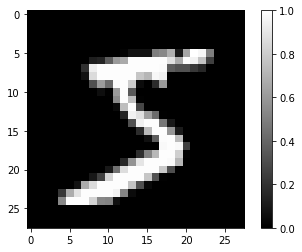

5


In [3]:
plt.imshow(train_X[0].reshape(28,28),cmap='gray')
plt.colorbar()
plt.show()
print(train_Y[0])

In [6]:
train_X=train_X.reshape(-1,28*28)
test_Y=test_X.reshape(-1,28*28)
print(train_X.shape,train_Y.shape)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(784,activation='relu',input_shape=(784,)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(784,activation='sigmoid')
])
model.compile(optimizer=tf.optimizers.Adam(),loss='mse')
model.summary()
model.fit(train_X,train_X,epochs=10,batch_size=256)

(60000, 784) (60000,)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 784)               50960     
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
235/235 [==============================] - 2s 3ms/step - loss: 0.0876
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0209A: 0s - los - ETA: 0s - loss: 0
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0133
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0108
Epo

In [ ]:
plt.figure(figsize=(4,8))
for c in range